## Importing libraries

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

## Viewing the dataset

In [2]:
data_raw = pd.read_csv("datasets/titanic_train.csv", index_col='PassengerId')
data_validate = pd.read_csv("datasets/titanic_test.csv", index_col='PassengerId')
data_raw.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,NaN,S
427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,NaN,S
695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S
176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S
706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


The trainingset has 891 examples and 11 features plus the target variable (survived), 2 of the features are floats, 5 are integers and 5 are objects. 

In [4]:
data_raw.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
data_raw.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Douglas, Mr. Walter Donald",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
data_raw['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
data_raw['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Cleaning Data

We'll make a copy of the raw data and put it in a list along with the validation set. We can later separate it into training and testing data.

In [8]:
data_copy = data_raw.copy(deep=True)
data_cleaner = [data_copy, data_validate]

We see that there are 891 entries in the dataset and 12 columns including the PassengerId as the index.

Of the 891 entries for Cabin 687 entries in total are null. This means that there isn't much we can do with the information about the cabin.

In addition, both the Ticket and Fare columns are more or less random. Furthermore, PassengerId is only a unique identifier and will not affect our model.

While it is possible to separate the Name into titles alone, I believe it is not needed.

So all of them are dropped.


We note that there 177 entries for Age do not exist. Instead of deleting these entries completely, we shall instead fill these age columns with the median age. 

In [9]:
for dataset in data_cleaner:
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    dataset.drop(['Cabin', 'Ticket', 'Fare', 'Name'], axis=1, inplace = True)

Now SibSp and Parch are described as follows:

    sibsp: The dataset defines family relations
    Sibling = brother, sister
    Spouse = husband, wife 

    parch: The dataset defines family relations 
    Parent = mother, father
    Child = daughter, son


In [10]:
for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    # We set IsAlone to 1/True for everyone and then change it to 0/False depending on their FamilySize.
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0
    dataset.drop(['SibSp', 'Parch'], axis=1, inplace = True)

C:\Users\akash\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
data_cleaner[0].head()

,Survived,Pclass,Sex,Age,Embarked,FamilySize,IsAlone
PassengerId,,,,,,,
1,0,3,male,22.0,S,2,0
2,1,1,female,38.0,C,2,0
3,1,3,female,26.0,S,1,1
4,1,1,female,35.0,S,2,0
5,0,3,male,35.0,S,1,1


Let us set male = 0 and female = 1. Also, we can set the port such that C = 0, Q = 1, S = 2. We leave age as the number it has.

In [12]:
for dataset in data_cleaner:
    dataset['Sex'].loc[dataset['Sex'] == 'male'] = 0
    dataset['Sex'].loc[dataset['Sex'] == 'female'] = 1
    dataset['Embarked'].loc[dataset['Embarked'] == 'C'] = 0
    dataset['Embarked'].loc[dataset['Embarked'] == 'Q'] = 1
    dataset['Embarked'].loc[dataset['Embarked'] == 'S'] = 2

C:\Users\akash\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
data_cleaner[0].head()

,Survived,Pclass,Sex,Age,Embarked,FamilySize,IsAlone
PassengerId,,,,,,,
1,0,3,0,22.0,2,2,0
2,1,1,1,38.0,0,2,0
3,1,3,1,26.0,2,1,1
4,1,1,1,35.0,2,2,0
5,0,3,0,35.0,2,1,1


## Splitting up the data

We can now split the data into the labels and features.

In [14]:
data_clean, data_validate = data_cleaner
data_labels = data_clean['Survived']
data_features = data_clean.drop('Survived', axis=1)

Splitting up the labels and features into training and testing sets.

In [15]:
features_train, features_test, labels_train, labels_test = train_test_split(data_features, data_labels,
                                                                            test_size=0.2, random_state=42)

##### Training Data

In [16]:
features_train.head()

,Pclass,Sex,Age,Embarked,FamilySize,IsAlone
PassengerId,,,,,,
332,1,0,45.5,2,1,1
734,2,0,23.0,2,1,1
383,3,0,32.0,2,1,1
705,3,0,26.0,2,2,0
814,3,1,6.0,2,7,0


In [17]:
labels_train.head()

PassengerId
332    0
734    0
383    0
705    0
814    0
Name: Survived, dtype: int64

##### Testing Data

In [18]:
features_test.head()

,Pclass,Sex,Age,Embarked,FamilySize,IsAlone
PassengerId,,,,,,
710,3,0,28.0,0,3,0
440,2,0,31.0,2,1,1
841,3,0,20.0,2,1,1
721,2,1,6.0,2,2,0
40,3,1,14.0,0,2,0


In [19]:
labels_test.head()

PassengerId
710    1
440    0
841    0
721    1
40     1
Name: Survived, dtype: int64

##### Validation Data

In [20]:
data_validate.head()

,Pclass,Sex,Age,Embarked,FamilySize,IsAlone
PassengerId,,,,,,
892,3,0,34.5,1,1,1
893,3,1,47.0,2,2,0
894,2,0,62.0,1,1,1
895,3,0,27.0,2,1,1
896,3,1,22.0,2,3,0


## Applying Naive Bayes

In [21]:
nb_classifier = GaussianNB()

In [22]:
t0 = time()
nb_classifier.fit(features_train, labels_train)
print("Training Time: ", time()-t0, "s.", sep='')

Training Time: 0.011408567428588867s.


In [23]:
t1 = time()
nb_pred = nb_classifier.predict(features_test)
print("Testing Time: ", time()-t1, "s.", sep='')

Testing Time: 0.0057599544525146484s.


In [24]:
print("Accuracy: ", accuracy_score(labels_test, nb_pred), ".", sep='')

Accuracy: 0.787709497207.


## Using a Decision Tree

In [25]:
dt_classifier = tree.DecisionTreeClassifier(min_samples_split=40)

In [26]:
t0 = time()
dt_classifier.fit(features_train, labels_train)
print("Training Time: ", round(time() - t0), "s")

Training Time:  0 s


In [27]:
t1 = time()
dt_prediction = dt_classifier.predict(features_test)
print("Prediction Time: ", round(time() - t1), "s")

Prediction Time:  0 s


In [28]:
print(accuracy_score(labels_test, dt_prediction))

0.826815642458


In [29]:
features_test.head()

,Pclass,Sex,Age,Embarked,FamilySize,IsAlone
PassengerId,,,,,,
710,3,0,28.0,0,3,0
440,2,0,31.0,2,1,1
841,3,0,20.0,2,1,1
721,2,1,6.0,2,2,0
40,3,1,14.0,0,2,0


## Finding the best tree with cross validation

In [39]:
cv = KFold(n_splits=10)            # Desired number of Cross Validation folds
accuracies = list()
max_attributes = len(list(test))
depth_range = range(1, max_attributes + 1)

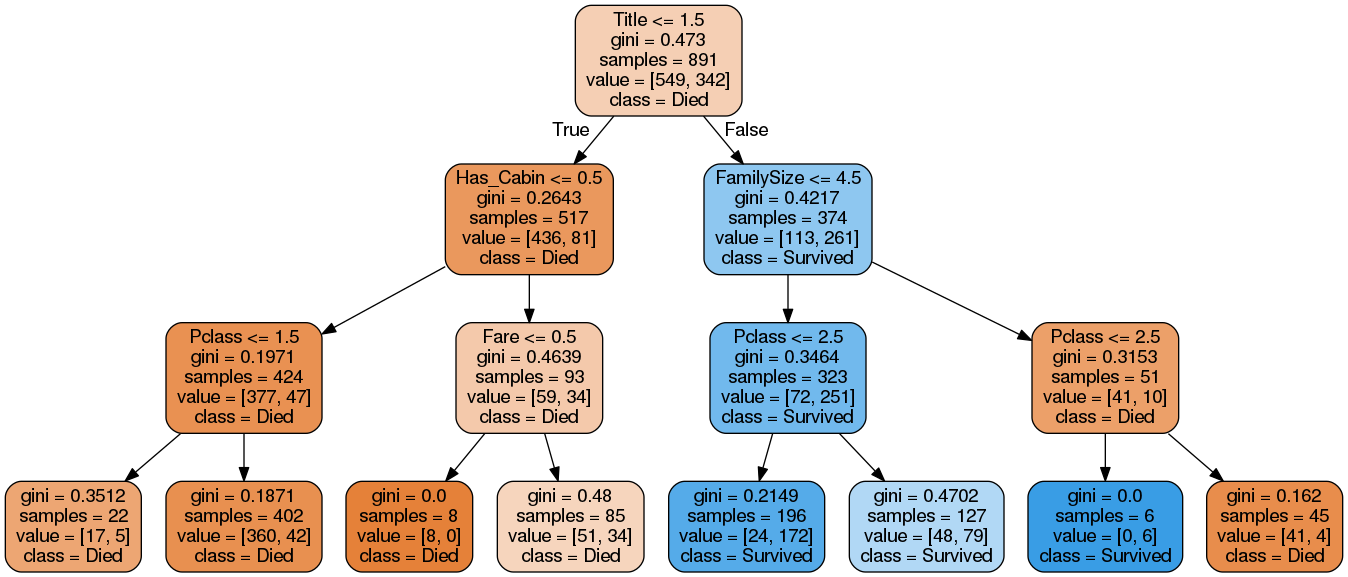

In [ ]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

accuracy: 82.379999999999995

## K-Fold Cross Validation:

K-Fold Cross Validation randomly splits the training data into K subsets called folds. 
The code below perform K-Fold Cross Validation on our random forest model, using 10 folds (K = 10). Therefore it outputs an array with 10 different scores.

In [3]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

NameError: name 'RandomForestClassifier' is not defined

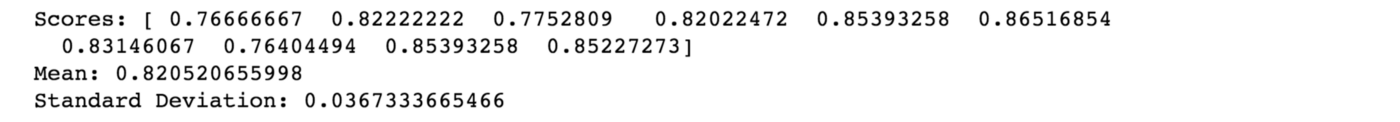

## Random forest:

Is an ensemble of Decision Trees, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

In [4]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

NameError: name 'RandomForestClassifier' is not defined

Accuracy: 92.82 (Cleaned data)

## Comparing algorithms:

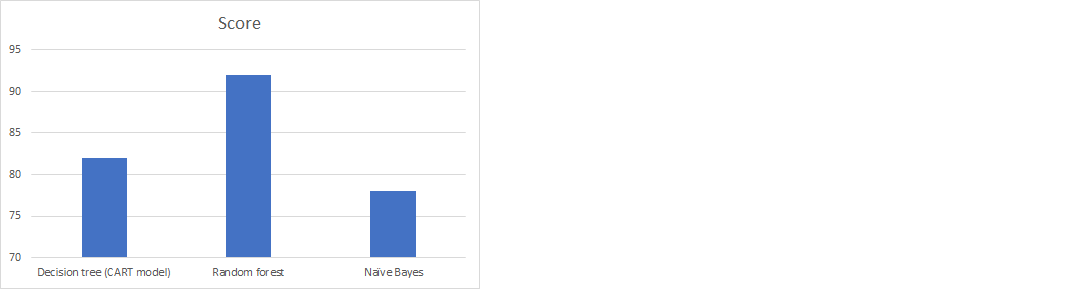